# **Assignment - 5 (Part A & B)**

---



Reading the dataset 'NSSO68.csv'
Filtering the dataset for Madhya Pradesh (MP)
Dataset Information:
Column Names: ['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number', 'Sample', 'Sector', 'state', 'State_Region', 'District', 'Stratum_Number', 'Sub_Stratum', 'Schedule_type', 'Sub_Round', 'Sub_Sample', 'FOD_Sub_Region', 'Hamlet_Group_Sub_Block', 't', 'X_Stage_Stratum', 'HHS_No', 'Level', 'Filler', 'hhdsz', 'NIC_2008', 'NCO_2004', 'HH_type', 'Religion', 'Social_Group', 'Whether_owns_any_land', 'Type_of_land_owned', 'Land_Owned', 'Land_Leased_in', 'Otherwise_possessed', 'Land_Leased_out', 'Land_Total_possessed', 'During_July_June_Cultivated', 'During_July_June_Irrigated', 'NSS', 'NSC', 'MLT', 'land_tt', 'Cooking_code', 'Lighting_code', 'Dwelling_unit_code', 'Regular_salary_earner', 'Perform_Ceremony', 'Meals_seved_to_non_hhld_members', 'Possess_ration_card', 'Type_of_ration_card', 'MPCE_URP', 'MPCE_MRP', 'Person_Srl_No', 'Relation', 'Sex', 'Age', 'Marital_Status', 'Educ

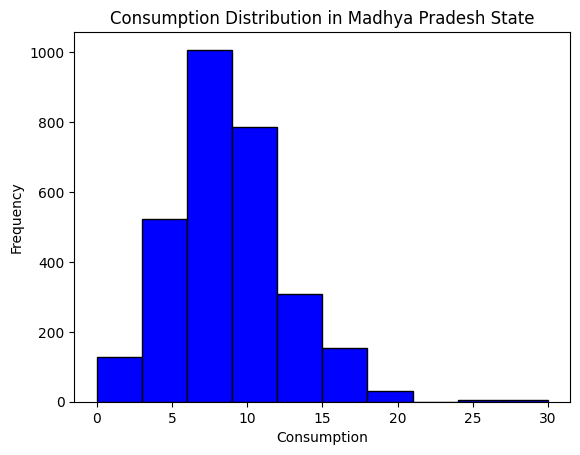

Aggregating total consumption by district
       District  total_consumption
0     Alirajpur         371.102273
1       Anuppur         146.861111
2    Ashoknagar         494.732143
3      Balaghat         202.711111
4       Barwani         263.666438
5         Betul         432.638095
6         Bhind         880.732053
7        Bhopal         721.809524
8     Burhanpur         243.813492
9    Chhatarpur         810.858135
10   Chhindwara         698.575505
11        Damoh         495.892857
12        Datia         504.298882
13        Dewas         667.282143
14         Dhar         468.349334
15      Dindori         111.326190
16   East Nimar         342.665873
17         Guna         567.367316
18      Gwalior         543.191270
19        Harda         349.601449
20  Hoshangabad         330.917388
21       Indore         916.912049
22     Jabalpur         491.744689
23       Jhabua         384.190476
24        Katni         343.611416
25       Mandla         150.625000
26     Mandsa

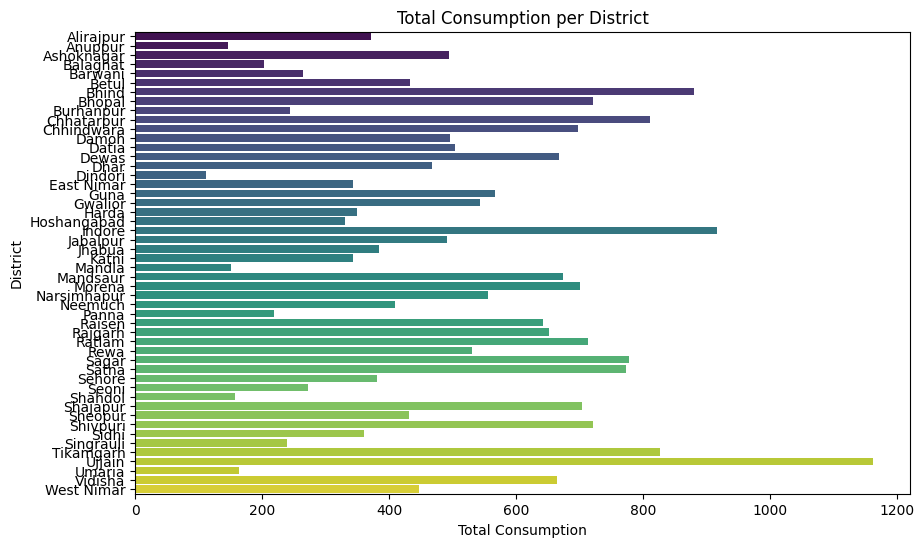

Plotting total consumption on the Madhya Pradesh state map


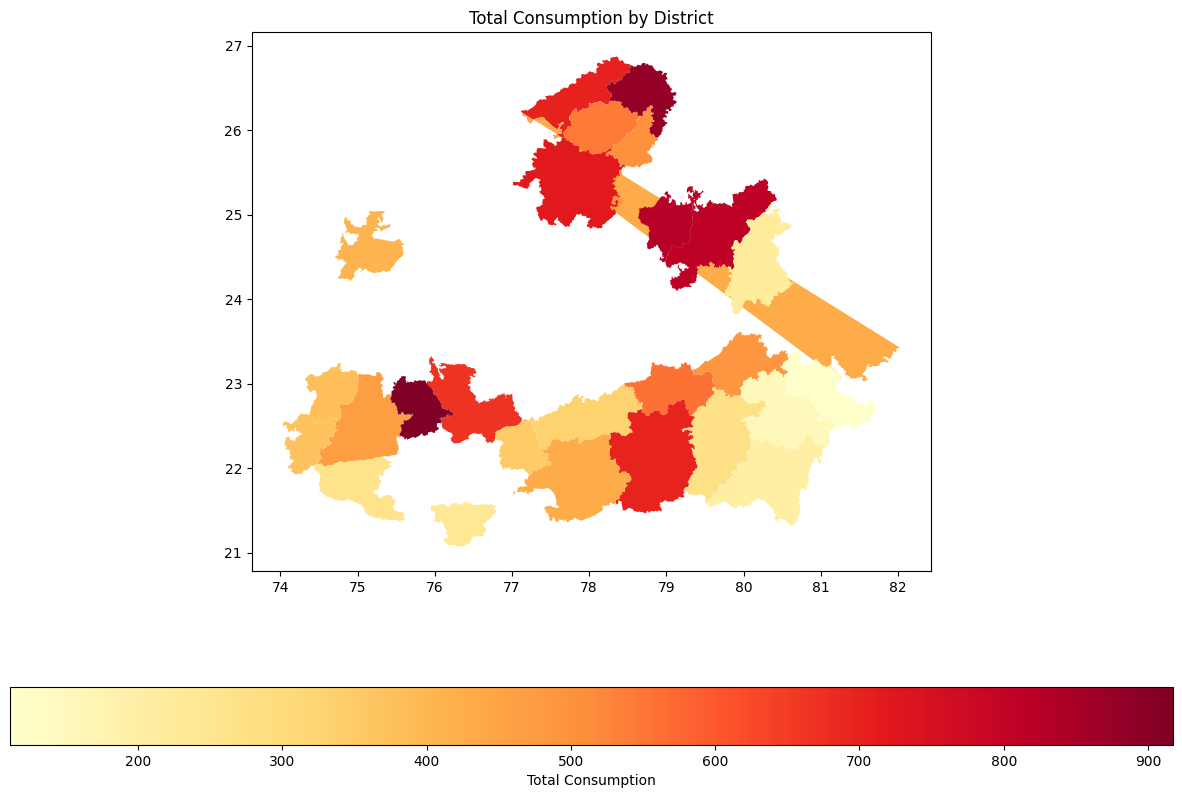

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

# Reading the dataset
print("Reading the dataset 'NSSO68.csv'")
data = pd.read_csv("NSSO68.csv")

# Filtering the dataset for Madhya Pradesh (MP)
print("Filtering the dataset for Madhya Pradesh (MP)")
df = data[data['state_1'] == "MP"]

# Display dataset information
print("Dataset Information:")
print("Column Names:", df.columns.tolist())
print("First few rows of the dataset:")
print(df.head())
print("Dimensions of the dataset:", df.shape)

# Finding missing values
print("Finding missing values in the dataset")
missing_info = df.isna().sum()
print("Missing Values Information:")
print(missing_info)

# Subsetting the data for analysis
print("Subsetting the data for analysis")
mpnew = df[['state_1', 'District', 'Region', 'Sector', 'State_Region', 'Meals_At_Home', 'ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q', 'No_of_Meals_per_day']]

# Function to impute missing values with mean for specific columns
def impute_with_mean(column):
    return column.fillna(column.mean())

# Impute missing values for 'Meals_At_Home'
print("Imputing missing values for 'Meals_At_Home'")
mpnew['Meals_At_Home'] = impute_with_mean(mpnew['Meals_At_Home'])

# Function to remove outliers from a dataset column
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - (1.5 * IQR)
    upper_threshold = Q3 + (1.5 * IQR)
    return df[(df[column_name] >= lower_threshold) & (df[column_name] <= upper_threshold)]

# Remove outliers from specific columns
print("Removing outliers from 'ricepds_v' and 'chicken_q'")
outlier_columns = ['ricepds_v', 'chicken_q']
for col in outlier_columns:
    mpnew = remove_outliers(mpnew, col)

# Summarize total consumption
print("Summarizing total consumption")
mpnew['total_consumption'] = mpnew[['ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q']].sum(axis=1)

# Function to summarize and display top consuming districts and regions
def summarize_consumption(df, group_col):
    summary = df.groupby(group_col)['total_consumption'].sum().reset_index()
    summary = summary.sort_values(by='total_consumption', ascending=False)
    return summary

# Summarize consumption by district and region
print("Summarizing consumption by district and region")
district_summary = summarize_consumption(mpnew, 'District')
region_summary = summarize_consumption(mpnew, 'Region')

# Display top consuming districts and region consumption summary
print("Top Consuming Districts:")
print(district_summary.head(4))
print("Region Consumption Summary:")
print(region_summary)

# Mapping district and sector codes to their names
print("Mapping district and sector codes to their names")
district_mapping = {
    "1": "Sheopur", "2": "Morena", "3": "Bhind", "4": "Gwalior",
    "5": "Datia", "6": "Shivpuri", "7": "Guna", "8": "Tikamgarh",
    "9": "Chhatarpur", "10": "Panna", "11": "Sagar", "12": "Damoh",
    "13": "Satna", "14": "Rewa", "15": "Umaria", "16": "Shahdol",
    "17": "Sidhi", "18": "Neemuch", "19": "Mandsaur", "20": "Ratlam",
    "21": "Ujjain", "22": "Shajapur", "23": "Dewas", "24": "Jhabua",
    "25": "Dhar", "26": "Indore", "27": "West Nimar", "28": "Barwani",
    "29": "East Nimar", "30": "Rajgarh", "31": "Vidisha", "32": "Bhopal",
    "33": "Sehore", "34": "Raisen", "35": "Betul", "36": "Harda",
    "37": "Hoshangabad", "38": "Katni", "39": "Jabalpur", "40": "Narsimhapur",
    "41": "Dindori", "42": "Mandla", "43": "Chhindwara", "44": "Seoni",
    "45": "Balaghat", "46": "Ashoknagar", "47": "Anuppur", "48": "Burhanpur",
    "49": "Alirajpur", "50": "Singrauli"
}
sector_mapping = {"2": "URBAN", "1": "RURAL"}

# Apply mappings to the dataset
print("Applying mappings to the dataset")
mpnew['District'] = mpnew['District'].astype(str)
mpnew['Sector'] = mpnew['Sector'].astype(str)
mpnew['District'] = mpnew['District'].map(district_mapping).fillna(mpnew['District'])
mpnew['Sector'] = mpnew['Sector'].map(sector_mapping).fillna(mpnew['Sector'])

# Plot histogram of total consumption
print("Plotting histogram of total consumption")
plt.hist(mpnew['total_consumption'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.title('Consumption Distribution in Madhya Pradesh State')
plt.show()

# Aggregate total consumption by district
print("Aggregating total consumption by district")
mp_consumption = mpnew.groupby('District')['total_consumption'].sum().reset_index()
print(mp_consumption)

# Plot total consumption by district using a barplot
print("Plotting total consumption by district using a barplot")
plt.figure(figsize=(10, 6))
sns.barplot(data=mp_consumption, x='total_consumption', y='District', palette='viridis')
plt.xlabel('Total Consumption')
plt.ylabel('District')
plt.title('Total Consumption per District')
plt.show()

# Plot total consumption on the Madhya Pradesh state map
print("Plotting total consumption on the Madhya Pradesh state map")
data_map = gpd.read_file("MADHYA PRADESH_DISTRICTS.geojson")
data_map = data_map.rename(columns={'dtname': 'District'})
data_map_data = data_map.merge(mp_consumption, on='District')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
data_map_data.plot(column='total_consumption', ax=ax, legend=True, cmap='YlOrRd',
                   legend_kwds={'label': "Total Consumption", 'orientation': "horizontal"})
plt.title('Total Consumption by District')
plt.show()


In [ ]:
%%shell
jupyter nbconvert --to html /content/Adhyayan_Amit_Jain_Assignment_A4c_V01109421.ipynb